In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from pybedtools import BedTool
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from scipy.spatial.distance import pdist, squareform
from plot_params import *
basedir= Path('/home/hsher/scratch/ABC_2rep/')
out_stem = 'K562_rep6'

In [2]:
externals =list(( basedir / 'counts/genome/vectors').glob('external*'))
multiplex = list(( basedir / 'counts/genome/vectors').glob(f'{out_stem}*'))
slbp = list(Path('/home/hsher/scratch/ABC_singleplex_SLBP/counts/genome/vectors/').glob('*K562'))
rbfox2 = list(Path('/home/hsher/scratch/ABC_singleplex_K562_RBFOX2/counts/genome/vectors/').glob('*K562'))

In [3]:
externals

[PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.oligoCLIP_ctrlSpike_rep1.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.oligoCLIP_ctrlBead_rep2.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.oligoCLIP_IgG_rep2.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.K562_totalRNAseq.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.oligoCLIP_IgG_rep1.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.eCLIP_SLBP_SMInput.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.oligoCLIP_ctrlBead_rep1.counts'),
 PosixPath('/home/hsher/scratch/ABC_2rep/counts/genome/vectors/external.oligoCLIP_ctrlSpike_rep2.counts')]

In [4]:
all_data = externals+multiplex+slbp+rbfox2

In [5]:
all_data_counts = pd.concat([pd.read_csv(i) for i in all_data], axis = 1)

In [6]:
frac = all_data_counts.div(all_data_counts.sum(axis = 0), axis = 1)

In [7]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_val = pca.fit_transform(frac.T)
pca_val = pd.DataFrame(pca_val, index = frac.columns, columns = ['PCA1', 'PCA2'])

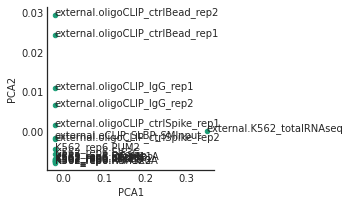

In [8]:
pca_val.plot.scatter(x = 'PCA1', y = 'PCA2', figsize = (3,3))
for index, row in pca_val.iterrows():
    plt.text(row['PCA1'], row['PCA2'], index)
sns.despine()
plt.savefig(figdir/'PCA_bg.pdf')